In [104]:
import pandas as pd
import numpy as ny
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import seaborn as sm
from sklearn.svm import SVC

In [66]:
iris = load_iris()

In [67]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [68]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [70]:
df = pd.DataFrame(iris.data,columns = iris.feature_names )    #to create a new data frame by accessing the data iniris data set 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
df['target'] = iris.target
df.head()                        #to add the target from iris_data set to the df data frame 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
df[df.target==1].head()                  #to view from where the target column gives 1 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [86]:
df['flower_name'] = df.target.apply(lambda x :iris.target_names[x])  #create a new column flower name in df and the values in that column is the name of the flower 
df   #lamda x is used to access the corresponding element fromthe column target names 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [87]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

Text(0, 0.5, 'sepal width (cm)')

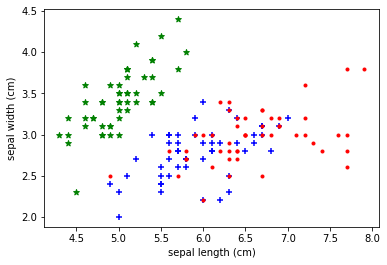

In [92]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'green',marker = '*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue',marker = '+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = 'red',marker = '.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

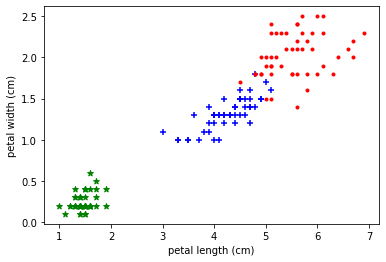

In [93]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'green',marker = '*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue',marker = '+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'red',marker = '.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [94]:
X = df.drop(['target','flower_name'],axis = 'columns')
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [96]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [97]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [99]:
lor = LogisticRegression()
lor

LogisticRegression()

In [100]:
lor.fit(X_train,y_train)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
lor.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 0, 1, 0, 1, 1, 1])

In [102]:
y_test

25     0
32     0
8      0
4      0
95     1
43     0
62     1
128    2
144    2
79     1
5      0
123    2
67     1
110    2
23     0
138    2
142    2
72     1
91     1
93     1
47     0
112    2
96     1
10     0
42     0
58     1
1      0
55     1
69     1
80     1
Name: target, dtype: int32

In [103]:
lor.score(X_test,y_test)

1.0

In [127]:
model = SVC(C=1,gamma=100,kernel='linear')   
model   #we can give the values of C(regularization), gamma , kernel to change the accuracy of the model which can be tested by score()

SVC(C=1, gamma=100, kernel='linear')

In [128]:
model.fit(X_train,y_train)

SVC(C=1, gamma=100, kernel='linear')

In [129]:
model.score(X_test,y_test)

0.9666666666666667

In [133]:
model.predict([[6.7,3.0,5.2,2.3]])    

array([2])